# Práctica 4. Explorando el Internet de las Cosas (IoT) con Python y MQTT

## Conocimientos Previos
Antes de comenzar esta guía, se espera que los estudiantes tengan conocimientos básicos en Python, incluyendo la capacidad de trabajar con variables, estructuras de control y funciones. Además, es beneficioso que tengan una comprensión general de los conceptos de redes y comunicación.

## Objetivos de Aprendizaje
Al finalizar esta guía, el estudiante deberá ser capaz de:

- Comprender los principios fundamentales del Internet de las Cosas (IoT).
- Utilizar el protocolo MQTT para la comunicación en entornos IoT.
- Implementar proyectos simples de IoT con Python y MQTT.

## Materiales

- Computadora con acceso a internet.
- Entorno de desarrollo integrado (IDE) para Python (como Visual Studio Code, PyCharm, o IDLE).
- Biblioteca Paho-MQTT para Python.

## Introducción

En esta guía, exploraremos cómo utilizar Python junto con el protocolo MQTT para desarrollar proyectos de IoT. El Internet de las Cosas permite la conexión y comunicación entre dispositivos, y MQTT es un protocolo ligero y eficiente que facilita esta comunicación.

## Actividades Preliminares

- **Instalación de Python**: Descarga e instala la última versión de Python desde el sitio oficial (https://www.python.org/). Asegúrate de tener Python instalado en tu computadora.
- **Instalación de un IDE**: Configura un entorno de desarrollo integrado según tu preferencia. Según la preferencia también se puede trabajar en entornos como Google Colab o Jupyter Notebooks.
- **Instalación de la Biblioteca MQTT**: Instala la biblioteca Paho-MQTT utilizando el gestor de paquetes de Python: "pip install paho-mqtt".

## Instalación de paho-mqtt

In [ ]:
!pip install paho-mqtt==1.6.1

## Actividad 1: Entendiendo IoT y MQTT

1. Investiga y describe los conceptos fundamentales del Internet de las Cosas (IoT). Puedes visitar la siguiente página web:
- [Conceptos fundamentales del IoT](https://aws.amazon.com/es/what-is/iot/#:~:text=con%20AWS%20IoT-,%C2%BFQu%C3%A9%20es%20el%20Internet%20de%20las%20cosas%20(IoT)%3F,como%20entre%20los%20propios%20dispositivos.)

2. Comprende cómo MQTT facilita la comunicación en entornos IoT. Puedes visitar las siguientes páginas web:
- [Sitio oficial MQTT](https://mqtt.org/#:~:text=MQTT%20is%20an%20OASIS%20standard,footprint%20and%20minimal%20network%20bandwidth.)
- [Conceptos fundamentales de MQTT](https://aws.amazon.com/es/what-is/mqtt/)

## Actividad 2: Configuración del Entorno

1. Crear un programa Python simple que establezca una conexión MQTT con un servidor.


## Programa simple para establecer conexión MQTT con un servidor

En esta instancia, emplearemos un servidor EMQX junto al puerto 1883 (sin seguridad) para lograr una conexión exitosa con el servidor MQTT.

In [ ]:
import paho.mqtt.client as mqtt

# Callback cuando se establece la conexión con el broker MQTT
def on_connect(client, userdata, flags, rc):
    if rc == 0:
        print("Conexión exitosa al broker MQTT")
    else:
        print(f"Fallo en la conexión. Código de retorno: {rc}")

# Configuración del cliente MQTT
client = mqtt.Client()
client.on_connect = on_connect

# Especifica el servidor MQTT y el puerto (por defecto es 1883)
mqtt_broker = "broker.emqx.io"
mqtt_port = 1883

# Conexión al servidor MQTT
client.connect(mqtt_broker, mqtt_port, 60)

# Inicia el bucle para mantener la conexión activa
client.loop_start()

# Aquí puedes agregar más funcionalidades o publicar/suscribir a temas MQTT

# Detener el bucle y cerrar la conexión
client.loop_stop()
client.disconnect()


Conexión exitosa al broker MQTT


0

2. Comprender los conceptos de publicación y suscripción en MQTT.

## Actividad 3: Proyecto Básico de IoT

1. Ejercicio práctico: Proyecto sencillo de IoT utilizando Python y MQTT.

Para este ejercicio vamos a conectar dos dispositivos y permitir la comunicación entre ellos.

En el siguiente esquema se representa la comunicación usando MQTT

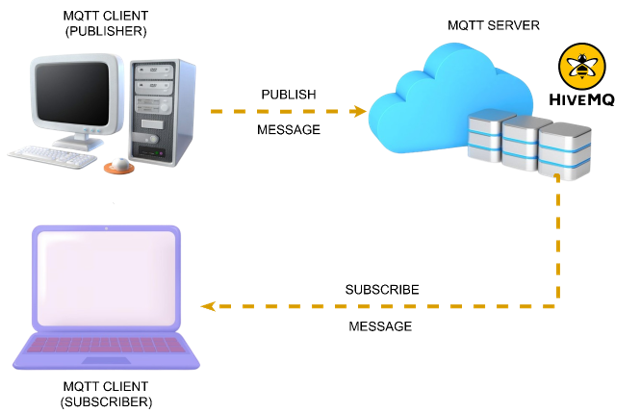

## Conexión de dispositivos

Con el objetivo de validar la capacidad de enviar y recibir mensajes mediante el protocolo MQTT, procederemos a implementar dos roles distintos: un cliente actuando como emisor de datos (publicador) y otro como receptor (suscriptor) utilizando Python. Además, configuraremos un servidor HiveMQ que implementa TLS, permitiendo así la utilización del puerto seguro 8883 para garantizar una conexión segura.

### **Configuración del servidor**

Para esta configuración, haremos uso del servidor HiveMQ Cloud, que nos brinda la capacidad de visualizar los mensajes a través de un cliente web. Para iniciar la configuración del servidor, por favor, siga estos pasos:

1. Acceda al siguiente enlace: [HiveMQ Cloud Login](https://auth.hivemq.cloud/login?state=hKFo2SBnM09tZFdQcEJVOUpST3puWERWaU9xa0RhTUpTUDJHbKFupWxvZ2luo3RpZNkgMWFBU2hBZVNLOUVWQWpReEpSUFRiYkFXNmFEalYwOFijY2lk2SBJYWpvNGUzMmp4d1VzOEFkRnhneFFuMlZQM1l3SVpUSw&client=Iajo4e32jxwUs8AdFxgxQn2VP3YwIZTK&protocol=oauth2&audience=hivemq-cloud-api&redirect_uri=https%3A%2F%2Fconsole.hivemq.cloud&scope=openid%20profile%20email&response_type=code&response_mode=query&nonce=WlVIOHBqc045ZEJEb295VjYyNENkbXNncFhtSUxuZlFZYzZuZXBwNi1kVA%3D%3D&code_challenge=qmT38NFziIG5nikxFXTkrQZUkYke3Apsmgw-SWqFTJE&code_challenge_method=S256&auth0Client=eyJuYW1lIjoiYXV0aDAtc3BhLWpzIiwidmVyc2lvbiI6IjEuMjIuNiJ9)

2. Cree una cuenta nueva o acceda utilizando sus credenciales de Google, GitHub o LinkedIn.

Después de completar estos pasos, se espera que aparezca la siguiente pantalla en su interfaz de HiveMQ Cloud.

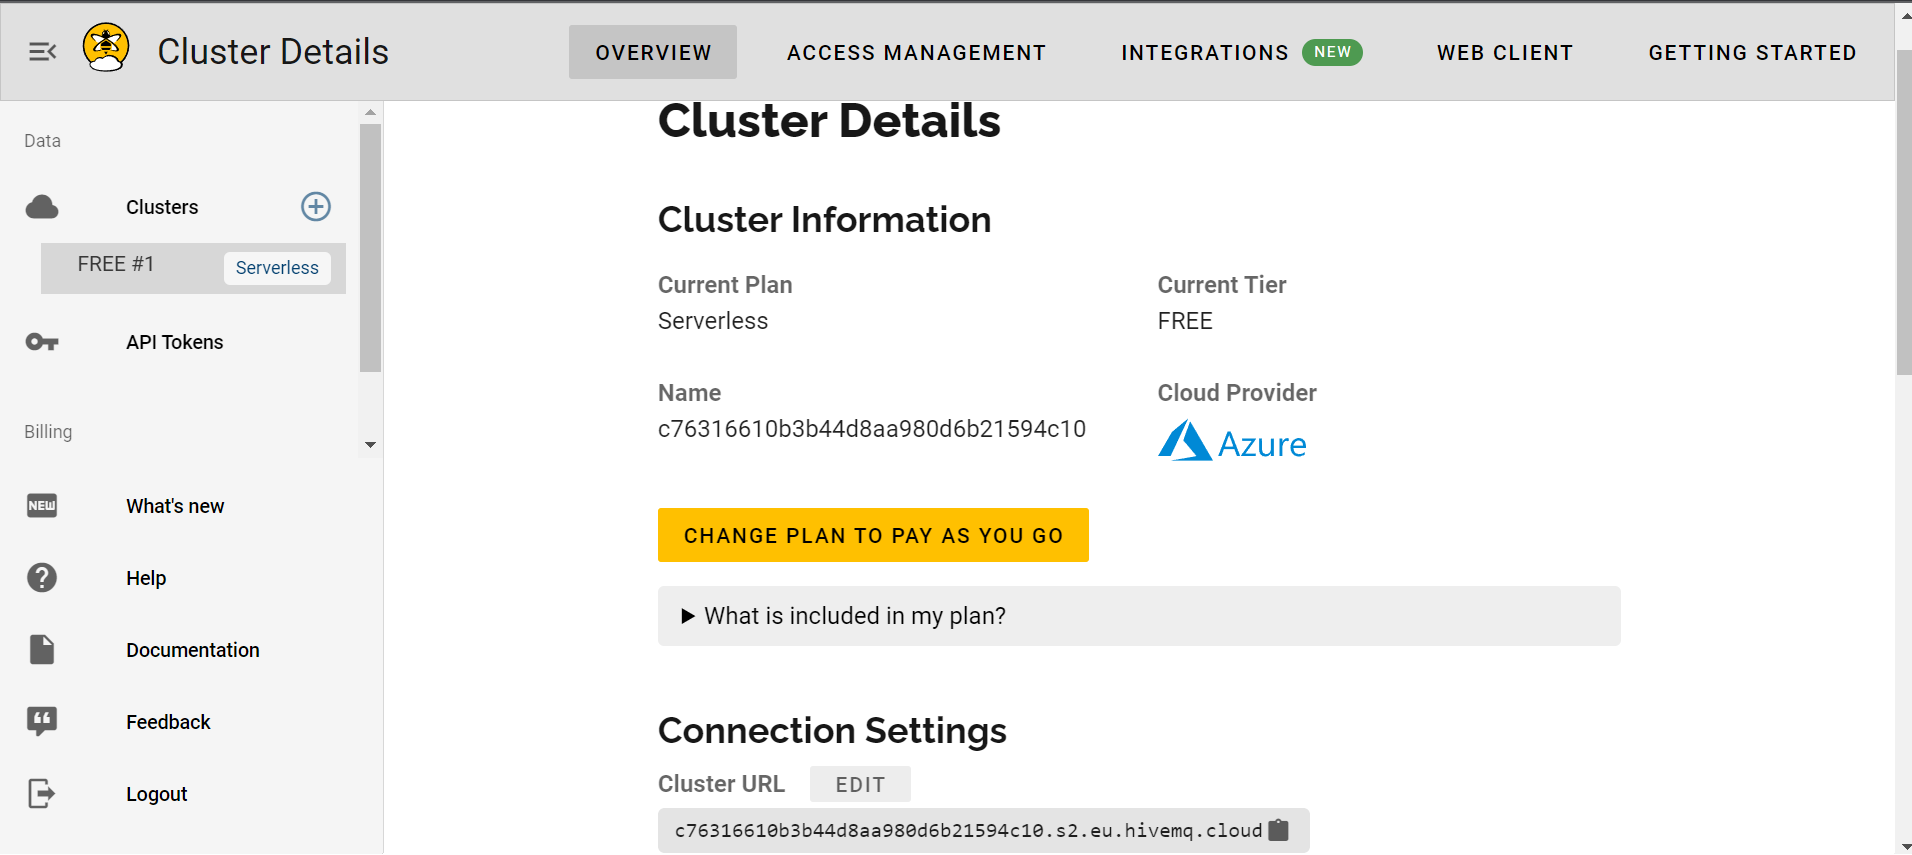

3. Para iniciar, diríjase a la sección de "Access Management" en el servidor HiveMQ. Aquí, se procede a crear un nuevo usuario y asignarle una contraseña. En las áreas resaltadas en naranja, puede elegir sus propias credenciales de usuario y contraseña. Sin embargo, se recomienda dejar sin cambios la sección resaltada en verde, que está configurada como "Publish and Subscribe". Este paso es crucial, ya que las credenciales especificadas aquí serán la clave para acceder al servidor. Para finalizar dar click en Create Credential.

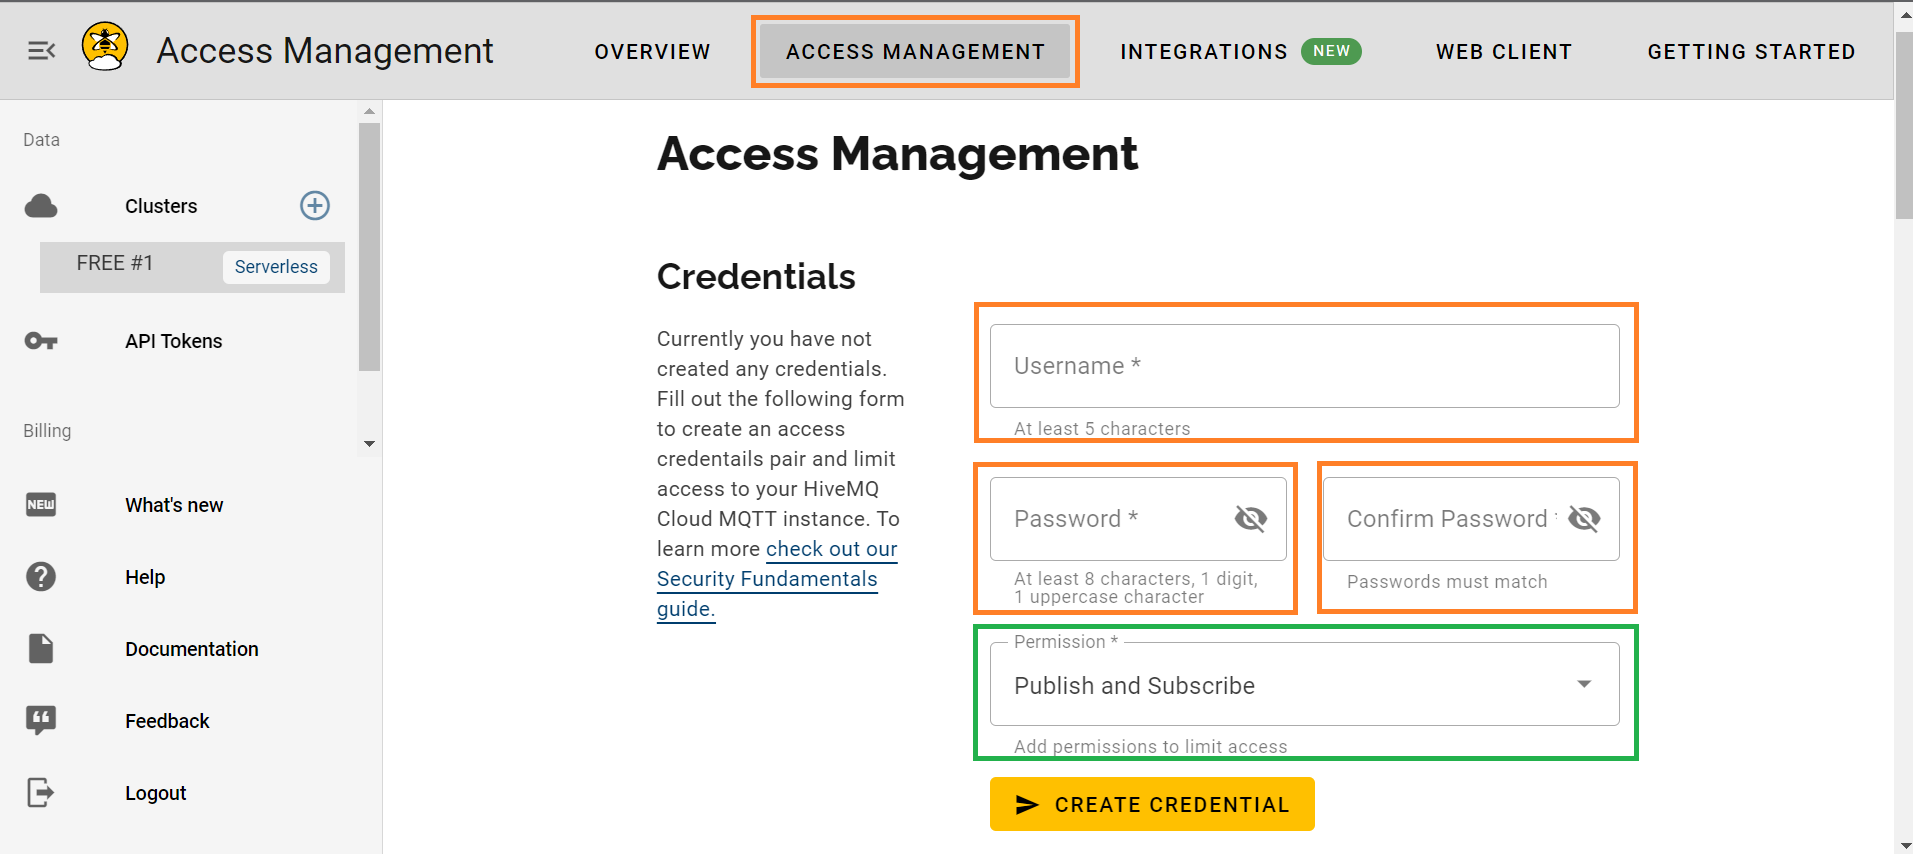

### **Creación del publicador**

Para la creación del publicador hay varias cosas que debemos tener en cuenta:

- **Configuración del cliente MQTT**

Estos son los parámetros del código que se encuentra más adelante, en la implementación.

> **mqtt_broker**: Se refiere a la dirección del servidor recién creado en HiveMQ Cloud, identificado como la URL del clúster en el servidor.

> **mqtt_port**: Indica el puerto que emplearemos para la conexión; en este caso, el puerto seguro 8883.

> **mqtt_topic**: Representa el tópico al cual dirigiremos los datos para ser enviados al servidor HiveMQ.

> **user**: Corresponde al usuario que creamos durante la configuración del servidor HiveMQ.

> **password**: Es la contraseña generada durante la configuración del servidor HiveMQ.

Esta información está disponible en la sección "Overview" del servidor. Asegúrese de utilizar estos parámetros para establecer una conexión exitosa y comenzar a publicar datos en su servidor HiveMQ Cloud.
En la sección "Overview" verá la siguiente información.

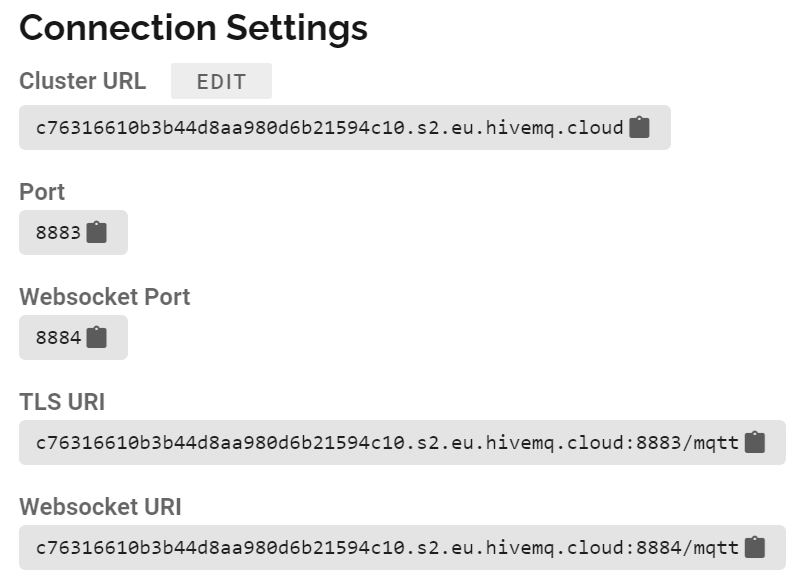

- **Implementación del publicador**

In [ ]:
import paho.mqtt.client as mqtt

#####################################
# Configuración del cliente MQTT
#####################################
mqtt_broker = "c76316610b3b44d8aa980d6b21594c10.s2.eu.hivemq.cloud"
mqtt_port = 8883
mqtt_topic = "miTopico"
user = "admin"
password = "Password1"
#####################################

#####################################
# Función de conexión
#####################################
def on_connect(client, userdata, flags, rc):
    if rc == 0:
        print("Conexión exitosa al broker MQTT")
    else:
        print(f"Fallo en la conexión. Código de retorno: {rc}")
#####################################

#####################################
# Callback para manejar la recepción de mensajes (opcional)
#####################################
def on_message(client, userdata, msg):
    print(f"Mensaje recibido en el topic {msg.topic}: {msg.payload.decode()}")
#####################################

#####################################
# Configuración del cliente MQTT
#####################################
client = mqtt.Client()
client.tls_set()  # habilita la conexión por el puerto seguro TLS
client.username_pw_set(user, password)  # establece las credenciales
client.on_connect = on_connect
client.on_message = on_message
#####################################

#####################################
# Conexión al servidor MQTT
#####################################
client.connect(mqtt_broker, mqtt_port, 60)
#####################################

#####################################
# Inicia el bucle para mantener la conexión activa
#####################################
client.loop_start()
#####################################

#####################################
# Bucle para enviar mensajes
#####################################
try:
    # Publica datos en el topic especificado
    while True:
        message = input("Ingrese el mensaje a publicar: ")
        client.publish(mqtt_topic, message)
except KeyboardInterrupt:
    # Detiene el bucle y cierra la conexión al recibir Ctrl + C
    print("\nDesconexión solicitada. Cerrando la conexión...")
    client.disconnect()
####################################

En el entorno de HiveMQ, contamos con una herramienta integrada que nos permite acceder a un cliente web, facilitándonos la visualización de los mensajes enviados. Para lograrlo, procedemos de la siguiente manera:

1. Accedemos con las credenciales previamente creadas.
2. Nos suscribimos al tópico específico que deseamos observar.

Este cliente web se encuentra en la sección "Web Client" del servidor HiveMQ. En este contexto, podemos observar que el mensaje "Hola, este es mi primer contacto con MQTT!" fue enviado al tópico "miTopico". Este resultado se evidencia como consecuencia de la ejecución del código anterior.

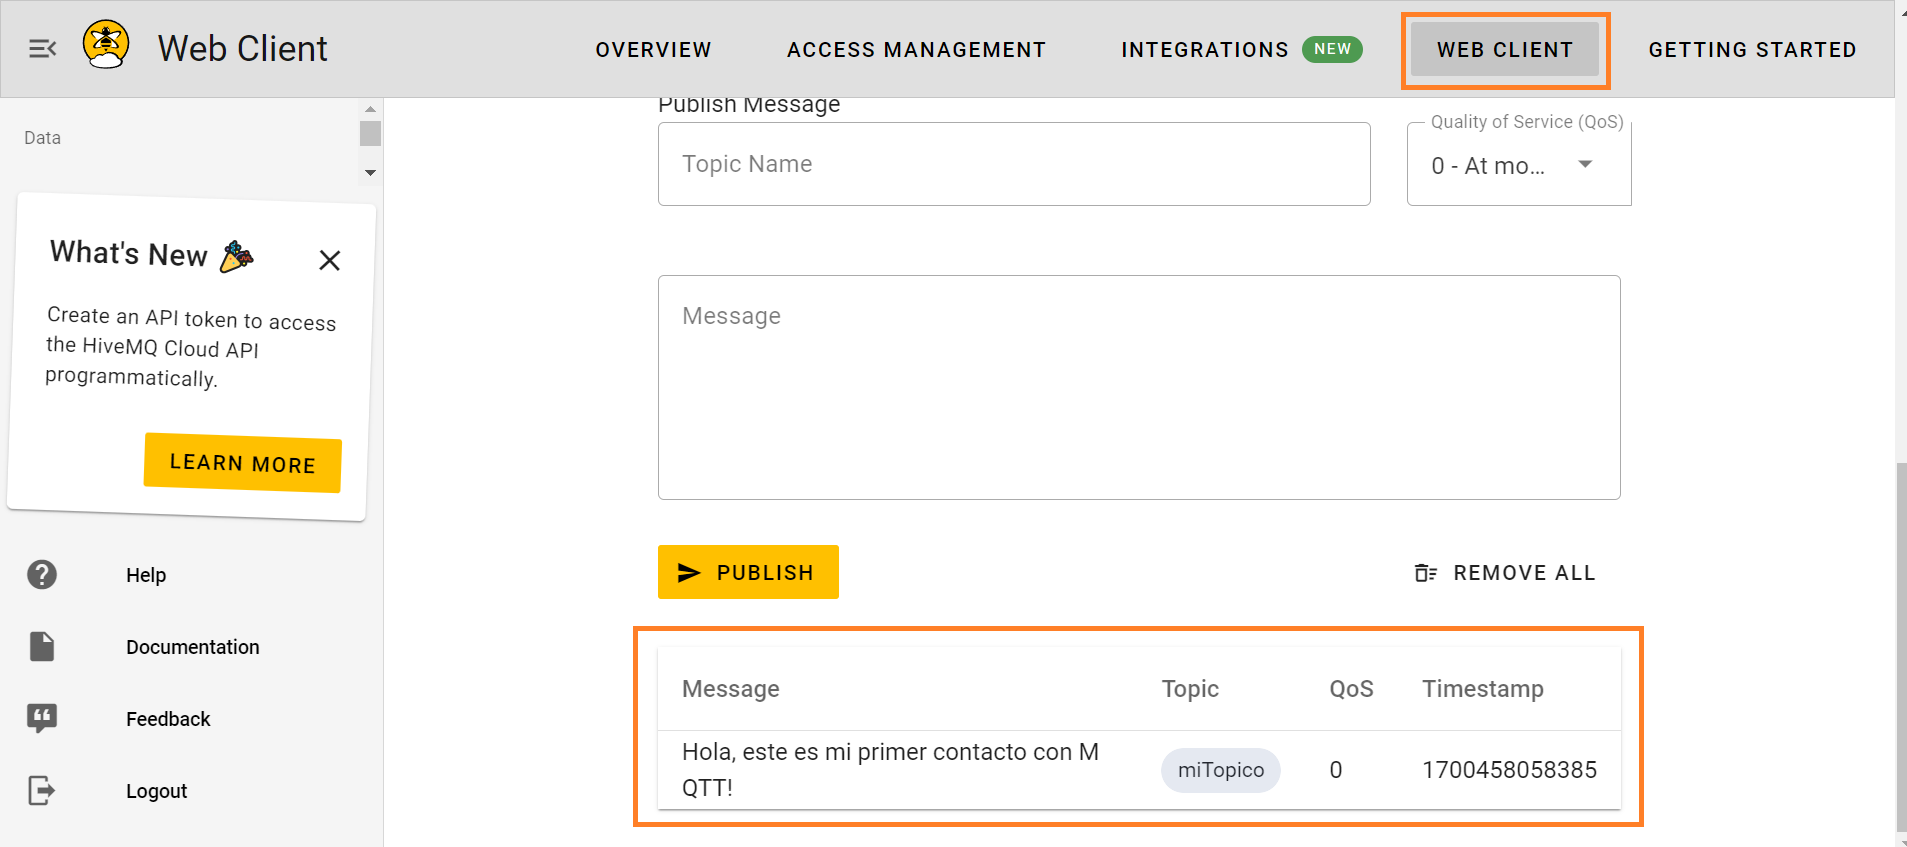

### Creación del suscriptor

Usando los mismos parámetros del publicador, vamos a desarrollar el suscriptor.

- **Implementación del suscriptor**

In [ ]:
import paho.mqtt.client as mqtt

######################################
# Configuración del cliente MQTT
######################################
mqtt_broker = "c76316610b3b44d8aa980d6b21594c10.s2.eu.hivemq.cloud"
mqtt_port = 8883
mqtt_topic = "miTopico"
user = "admin"
password = "Password1"
######################################

######################################
# Callback cuando se establece la conexión con el broker MQTT
######################################
def on_connect(client, userdata, flags, rc):
    if rc == 0:
        print("Conexión exitosa al broker MQTT")
        # Suscripción al tópico deseado después de la conexión exitosa
        client.subscribe(mqtt_topic)
    else:
        print(f"Fallo en la conexión. Código de retorno: {rc}")
######################################

######################################
# Callback para manejar la recepción de mensajes
######################################
def on_message(client, userdata, msg):
    print(f"Mensaje recibido en el topic {msg.topic}: {msg.payload.decode()}")
######################################

######################################
# Configuración del cliente MQTT
######################################
client = mqtt.Client()
client.tls_set()  # Configuración de TLS
client.username_pw_set(user, password)  # Autenticación
client.on_connect = on_connect
client.on_message = on_message
######################################

######################################
# Conexión al servidor MQTT con TLS y autenticación
######################################
client.connect(mqtt_broker, mqtt_port, 60)
######################################

######################################
# Bucle para enviar mensajes
######################################
try:
    # Inicia el bucle para mantener la conexión activa
    client.loop_forever()
except KeyboardInterrupt:
    # Detiene el bucle y cierra la conexión al recibir Ctrl + C
    print("\nDesconexión solicitada. Cerrando la conexión...")
    client.disconnect()

Para verificar el funcionamiento adecuado del suscriptor, se pueden realizar las siguientes acciones:

1. Enviar Datos desde el Cliente Web de HiveMQ:

> - Utilice el cliente web integrado en el servidor HiveMQ para enviar datos.

> - Visualice la recepción de estos datos en el cliente Python del código previamente proporcionado.

2. Utilizar el código del publicador anterior:

> - Emplee el código del publicador desarrollado anteriormente para enviar datos desde el cliente Python.

> - Observe la correcta visualización de la información en el cliente Python (suscriptor).

De cualquier manera, el resultado esperado es la correcta visualización de la información transmitida a través del servidor HiveMQ, utilizando el tópico especificado. Este proceso garantiza la coherencia y efectividad de la suscripción al servidor.

## Actividad de Cierre (Opcional)

- Implementa un proyecto más avanzado que involucre el uso de sensores o actuadores controlados por MQTT.

## Conceptos para Revisar
Antes de avanzar a la siguiente guía, revisa los siguientes conceptos:

- Calidad de servicio (QoS).
- Software Ignition.

## Referencias Bibliográficas

- Manual de HiveMQ Cloud. [Manual HiveMQ Cloud](https://docs.hivemq.com/hivemq-cloud/index.html)

- Documentación de Paho-MQTT. [Paho-MQTT](https://www.eclipse.org/paho/index.php?page=downloads.php).
